#📌 Extracão

In [1]:
import pandas as pd
import json
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [2]:
import requests

response = requests.get(url)
data = response.json()
dados = pd.json_normalize(data)
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
import numpy as np

col_numericas = ['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod','account.Charges.Total']
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('No','0'))
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,0,DSL,...,Yes,0,Yes,Yes,0,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,0,0,0,0,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,0,0,4,Yes,0,Fiber optic,...,0,Yes,0,0,0,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,0,13,Yes,0,Fiber optic,...,Yes,Yes,0,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,0,3,Yes,0,Fiber optic,...,0,0,Yes,Yes,0,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,0,DSL,...,0,0,Yes,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,0,22,Yes,Yes,Fiber optic,...,0,0,0,0,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,0,DSL,...,Yes,0,0,0,0,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,0,DSL,...,0,Yes,Yes,0,Yes,Two year,0,Mailed check,67.85,4627.65


In [5]:
col_numericas = ['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod','account.Charges.Total']
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Yes','1'))
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [6]:
col_numericas = ['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod','account.Charges.Total']
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Yes','1'))
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Female','1'))
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Male','0'))
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,0,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,0,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,0,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [8]:
dados['internet.InternetService'].str.lower()

,internet.InternetService
0,dsl
1,dsl
2,fiber optic
3,fiber optic
4,fiber optic
...,...
7262,dsl
7263,fiber optic
7264,dsl
7265,dsl


In [9]:
dados['internet.InternetService'] = dados['internet.InternetService'].str.lower()
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [10]:
col_textos=['account.Contract','account.PaymentMethod','phone.MultipleLines']
dados[col_textos] = dados[col_textos].apply(lambda x: x.str.lower())
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,1,0,1,1,0,one year,1,mailed check,65.60,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,0,0,0,0,1,month-to-month,0,mailed check,59.90,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,0,1,0,0,0,month-to-month,1,electronic check,73.90,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,0,1,1,0,month-to-month,1,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,0,1,0,0,one year,0,mailed check,55.15,742.9
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,0,0,0,0,1,month-to-month,1,electronic check,85.10,1873.7
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,1,0,0,0,0,month-to-month,1,mailed check,50.30,92.75
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,0,1,1,0,1,two year,0,mailed check,67.85,4627.65


In [11]:
#Criando a coluna 'Contas_diarias'
dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'], errors='coerce')
dados['account.Charges.Monthly'] = pd.to_numeric(dados['account.Charges.Monthly'], errors='coerce')
dados['Contas_diarias'] = dados['account.Charges.Monthly']/30
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,1,0,0,one year,0,mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,0,0,0,1,month-to-month,1,electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,0,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,1,1,0,1,two year,0,mailed check,67.85,4627.65,2.261667


In [12]:
#dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'], errors='coerce')
#dados['account.Charges.Monthly'] = pd.to_numeric(dados['account.Charges.Monthly'], errors='coerce')
#dados['Contas_diarias'] = dados['account.Charges.Total'] / dados['account.Charges.Monthly']
#dados

#📊 Carga e análise

In [13]:
#Calculando media, mediana e desvio padrao
media = dados['Contas_diarias'].mean()
mediana = dados['Contas_diarias'].median()
desvio_padrao = dados['Contas_diarias'].std()
dados = dados.assign(media=media, mediana=mediana, desvio_padrao=desvio_padrao)
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_diarias,media,mediana,desvio_padrao
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,0,one year,1,mailed check,65.60,593.30,2.186667,2.157337,2.343333,1.004319
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,1,month-to-month,0,mailed check,59.90,542.40,1.996667,2.157337,2.343333,1.004319
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,0,month-to-month,1,electronic check,73.90,280.85,2.463333,2.157337,2.343333,1.004319
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,month-to-month,1,electronic check,98.00,1237.85,3.266667,2.157337,2.343333,1.004319
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,month-to-month,1,mailed check,83.90,267.40,2.796667,2.157337,2.343333,1.004319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,one year,0,mailed check,55.15,742.90,1.838333,2.157337,2.343333,1.004319
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,1,month-to-month,1,electronic check,85.10,1873.70,2.836667,2.157337,2.343333,1.004319
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,0,month-to-month,1,mailed check,50.30,92.75,1.676667,2.157337,2.343333,1.004319
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,1,two year,0,mailed check,67.85,4627.65,2.261667,2.157337,2.343333,1.004319


In [14]:
#identificando valores diferentes nas colunas "media', 'mediana' e 'desvio_padrao'

media_vals = dados['media'].unique()
mediana_vals = dados['mediana'].unique()
desvio_padrao_vals = dados['desvio_padrao'].unique()

print("Unique values in 'media':", media_vals)
print("Unique values in 'mediana':", mediana_vals)
print("Unique values in 'desvio_padrao':", desvio_padrao_vals)

Unique values in 'media': [2.15733659]
Unique values in 'mediana': [2.34333333]
Unique values in 'desvio_padrao': [1.00431906]


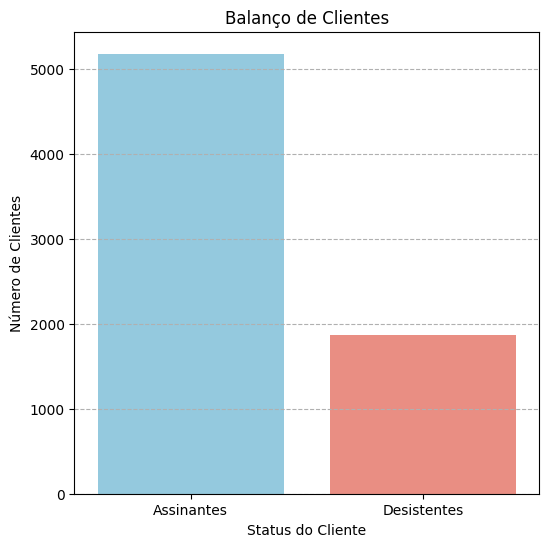

In [15]:
#Gráfico para identificar os clientes que sairam e os que permanecem.

import seaborn as sns
import matplotlib.pyplot as plt


churn_counts = dados['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']


churn_counts['Churn'] = churn_counts['Churn'].map({'0': 'Assinantes', '1': 'Desistentes'})


plt.figure(figsize=(6, 6))
sns.barplot(x='Churn', y='Count', data=churn_counts, palette=['skyblue', 'salmon'], hue='Churn', legend=False)
plt.title('Balanço de Clientes')
plt.xlabel('Status do Cliente')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--')
plt.savefig('balanco_clientes.png')
plt.show()


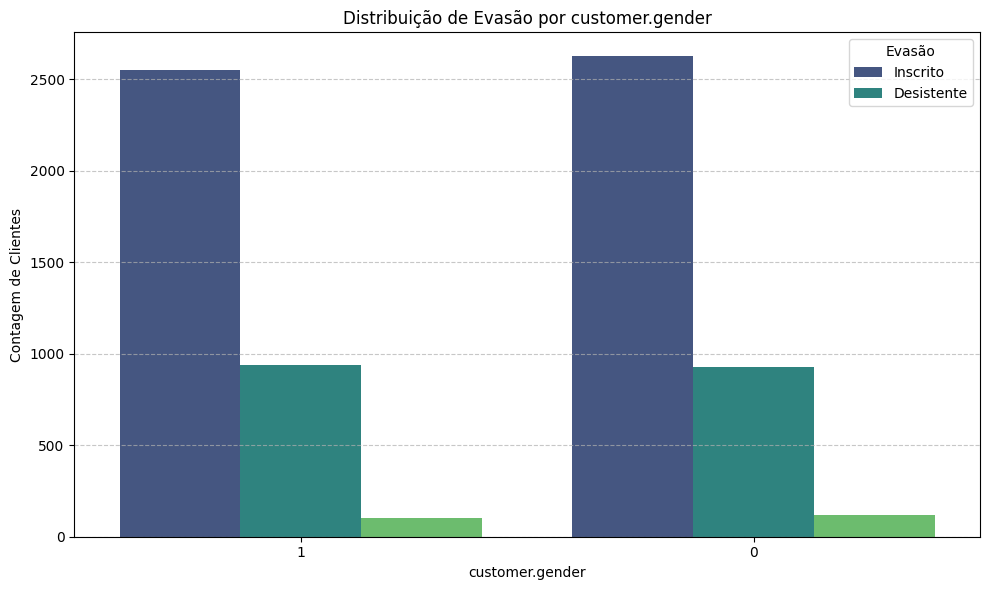

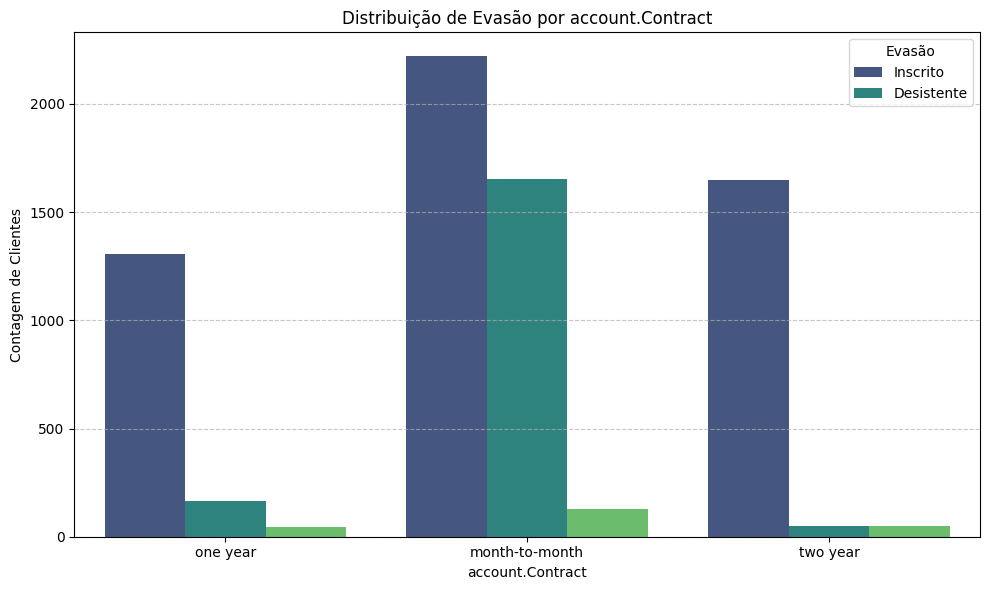

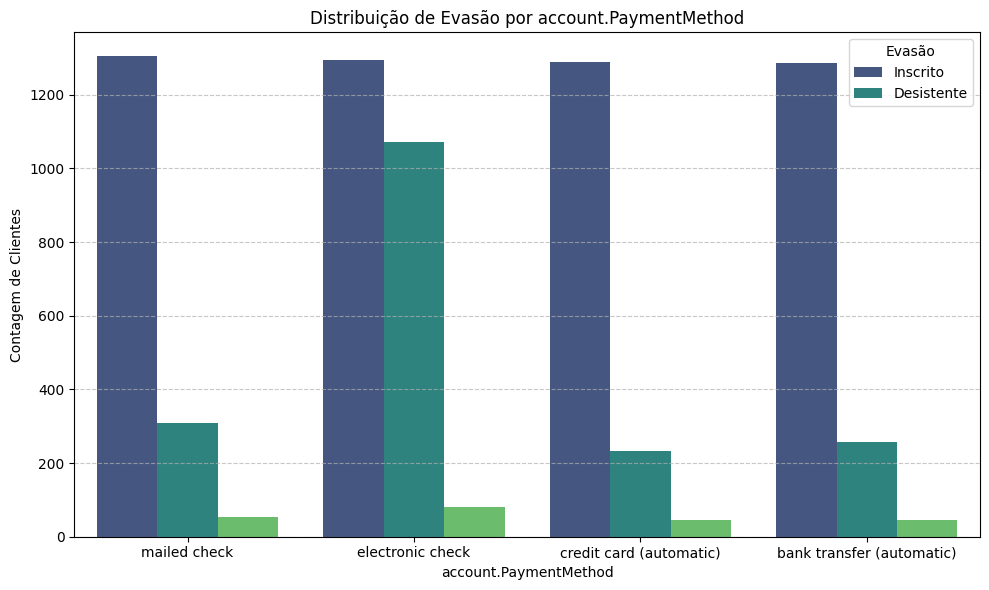

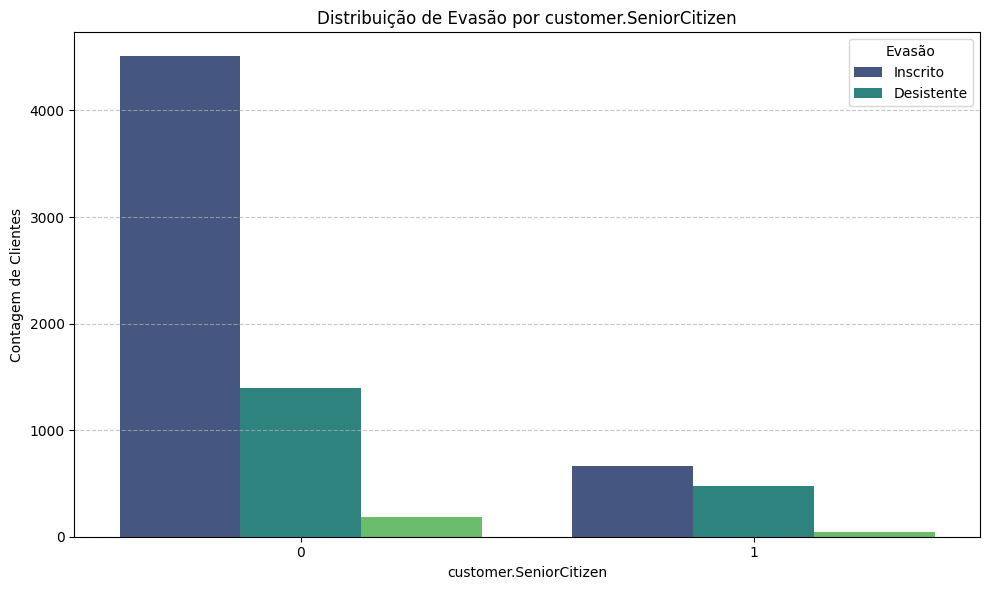

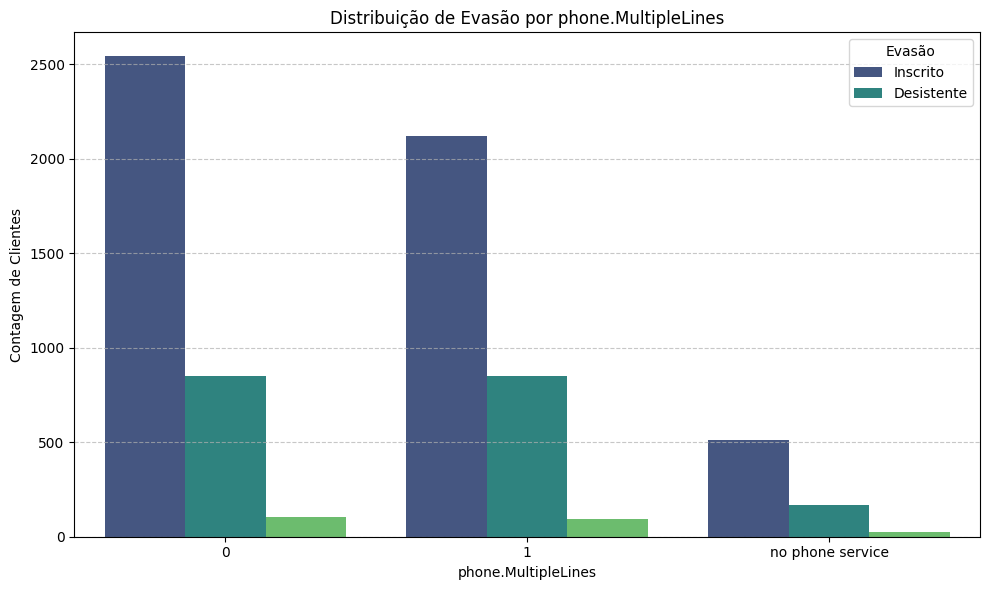

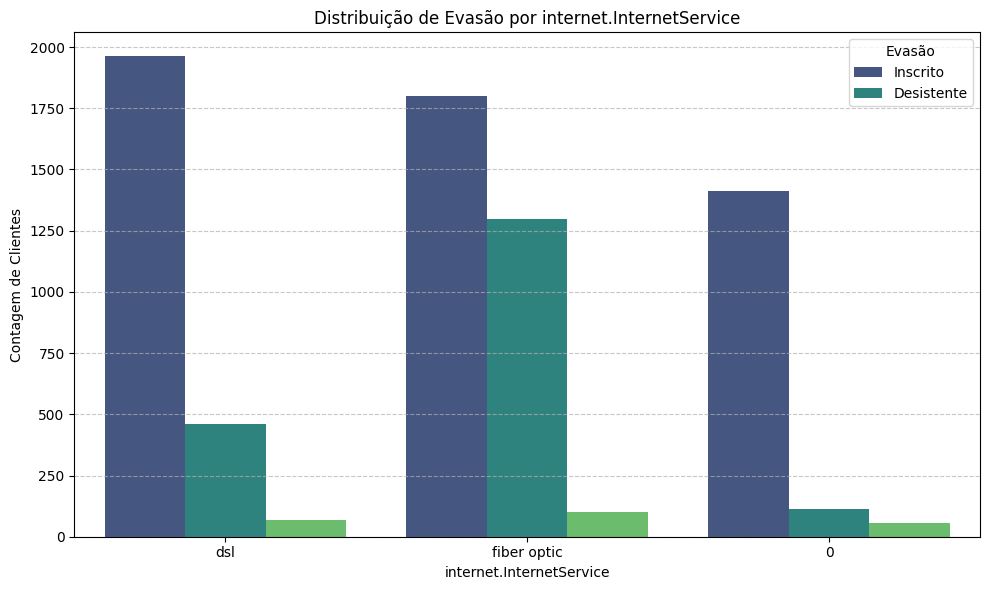

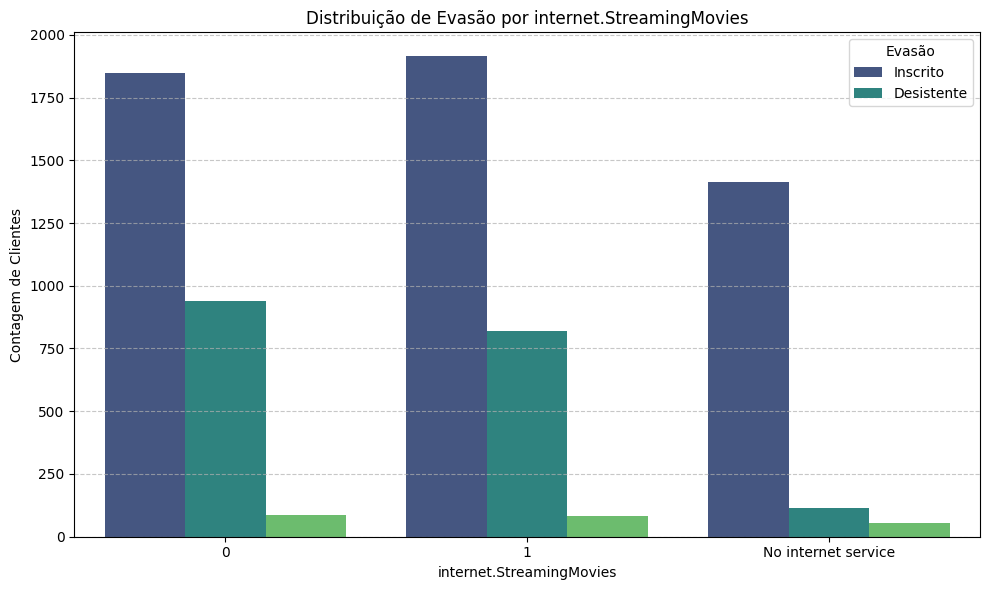

In [16]:
#Gráfico mostrando como a evasão se distribui através das colunas 'customer.gender', 'account.Contract', 'account.PaymentMethod','customer.SeniorCitizen','phone.MultipleLines','internet.InternetService','internet.StreamingMovies'

import matplotlib.pyplot as plt
import seaborn as sns

def save_plot(fig, filename):
    fig.savefig(filename, bbox_inches='tight')

categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod','customer.SeniorCitizen','phone.MultipleLines','internet.InternetService','internet.StreamingMovies']
for var in categorical_vars:
    fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axes
    sns.countplot(data=dados, x=var, hue='Churn', palette='viridis', ax=ax) # Pass the axes to sns.countplot
    plt.title(f'Distribuição de Evasão por {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem de Clientes')
    plt.legend(title='Evasão', loc='upper right', labels=['Inscrito', 'Desistente'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    save_plot(fig, f'evasao_{var}.png') # Pass the figure to save_plot and use a dynamic filename
    plt.close(fig) # Close the figure to prevent it from displaying immediately


from IPython.display import Image, display
for var in categorical_vars:
    display(Image(f'evasao_{var}.png'))

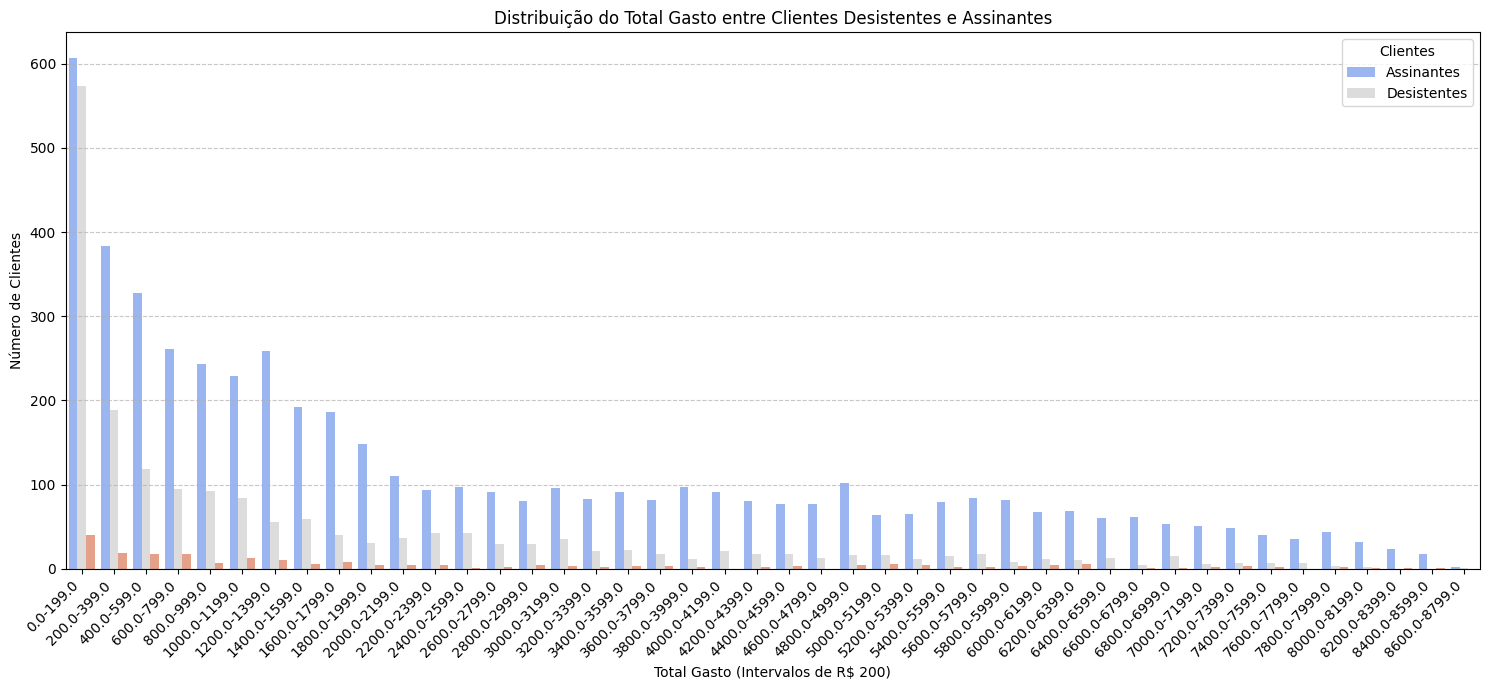

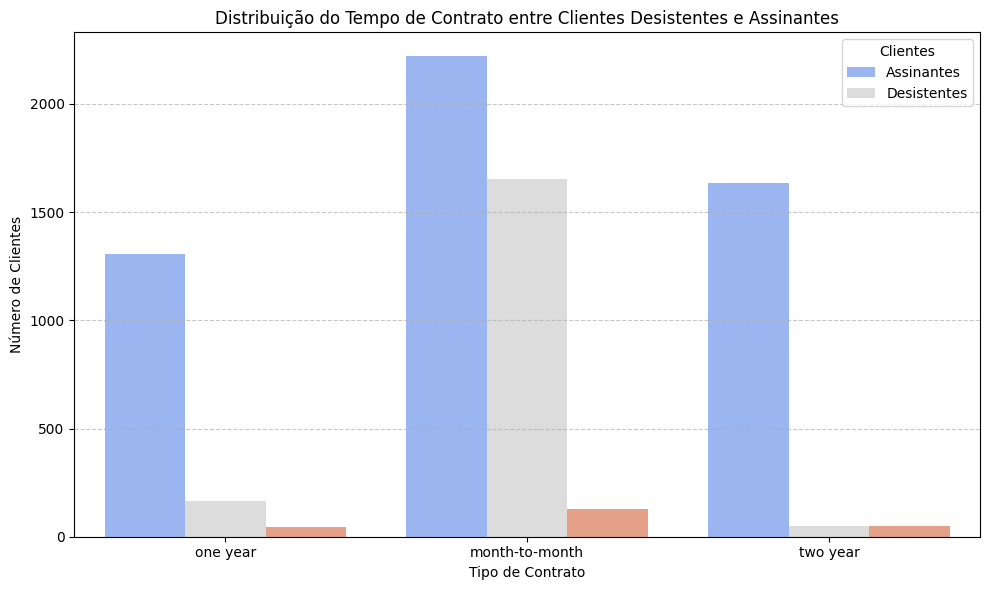

In [17]:
#Grafico com as colunas "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Converter 'account.Charges.Total' para numérico, tratando erros
dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'], errors='coerce')

# Remover linhas com valores NaN na coluna 'account.Charges.Total' que podem ter surgido da conversão
dados.dropna(subset=['account.Charges.Total'], inplace=True)

# Definir os intervalos para a contagem
bins = np.arange(0, dados['account.Charges.Total'].max() + 200, 200)

# Criar uma nova coluna para os intervalos de total gasto
dados['Total_Gasto_Range'] = pd.cut(dados['account.Charges.Total'], bins=bins, right=False, labels=[f'{i}-{i+199}' for i in bins[:-1]])

# Criar o gráfico de contagem
plt.figure(figsize=(15, 7))
sns.countplot(data=dados, x='Total_Gasto_Range', hue='Churn', palette='coolwarm')
plt.title('Distribuição do Total Gasto entre Clientes Desistentes e Assinantes')
plt.xlabel('Total Gasto (Intervalos de R$ 200)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clientes', loc='upper right', labels=['Assinantes', 'Desistentes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('total_gasto_churn_distribuicao.png')

# Exibir o gráfico
plt.show()


# Para 'tempo de contrato' (assumindo que 'account.Contract' representa isso, vamos contar a frequência de cada tipo de contrato)
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='account.Contract', hue='Churn', palette='coolwarm')
plt.title('Distribuição do Tempo de Contrato entre Clientes Desistentes e Assinantes')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Clientes', loc='upper right', labels=['Assinantes', 'Desistentes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('tempo_contrato_churn_distribuicao.png')

# Exibir o gráfico
plt.show()


#📄Relatorio Final

Relatório de Análise de Evasão de Clientes (Churn)
---
## Introdução
Este relatório apresenta uma análise exploratória dos dados de clientes de uma empresa de telecomunicações com o objetivo de identificar padrões e fatores que contribuem para a evasão de clientes (Churn). O problema do Churn é crítico para qualquer negócio baseado em assinaturas, pois reter clientes existentes é geralmente mais custo-efetivo do que adquirir novos. Através da análise de diversas características dos clientes e de seus comportamentos, buscamos entender as causas da evasão e propor recomendações para mitigar esse problema.
## Limpeza e Tratamento de Dados
Os dados foram obtidos a partir de um arquivo JSON hospedado no GitHub.
Os passos de limpeza e tratamento incluíram:
- **Importação:** Os dados foram carregados utilizando a biblioteca pandas a partir da URL fornecida.
- **Normalização:** Como o arquivo JSON possuía uma estrutura aninhada, utilizamos pd.json_normalize para achatar a estrutura e criar um DataFrame tabular.
- **Tratamento de Valores Categóricos:** Valores como 'Yes'/'No' e 'Female'/'Male' em colunas relevantes foram substituídos por 1s e 0s para facilitar a análise numérica e a modelagem futura. Termos como 'internet.InternetService', 'account.Contract' e 'phone.MultipleLines' foram convertidos para minúsculas para padronização.
- **Conversão de Tipos de Dados:** As colunas relacionadas a cobranças ('account.Charges.Total', 'account.Charges.Monthly') foram convertidas para tipos numéricos. Valores que não puderam ser convertidos foram tratados (erros foram convertidos para NaN e removidos).
- **Criação de Novas Features:** Uma coluna 'Contas_diarias' foi criada para representar a média de cobrança diária com base na cobrança mensal. Medidas estatísticas (média, mediana, desvio padrão) da coluna 'Contas_diarias' foram calculadas e adicionadas ao DataFrame.

## Análise Exploratória de Dados (AED)
A AED foi realizada para visualizar a distribuição dos dados e identificar possíveis correlações com a variável Churn. Diversos gráficos foram gerados:
### Balanço de Clientes (Assinantes vs. Desistentes)
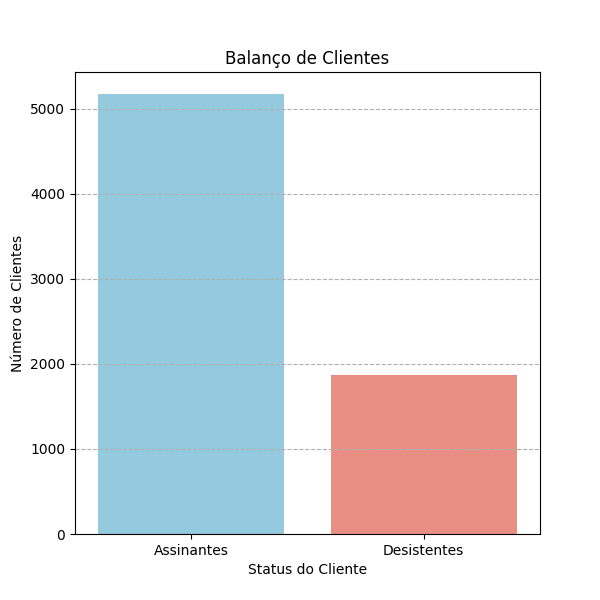

O gráfico de barras mostra a proporção de clientes que permaneceram (Assinantes) versus aqueles que evadiram (Desistentes). É visível que a base de clientes que não evadiu é consideravelmente maior, indicando um desequilíbrio na distribuição da variável alvo.

### Distribuição de Evasão por Variáveis Categóricas
Foram gerados gráficos de contagem para entender como a evasão se distribui entre diferentes categorias de serviço e características do cliente:
#### Evasão por Gênero
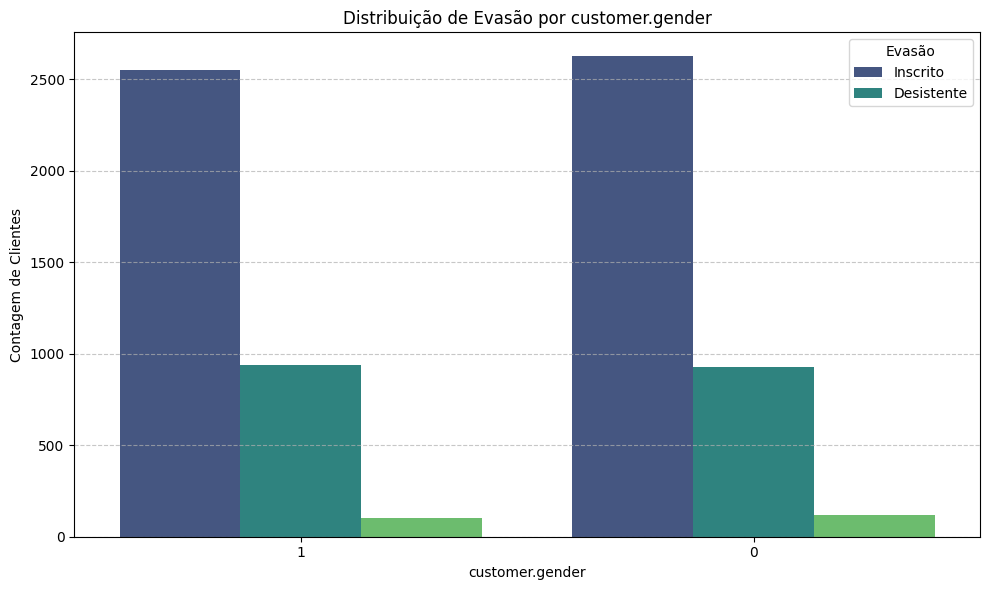
#### Evasão por Tipo de Contrato
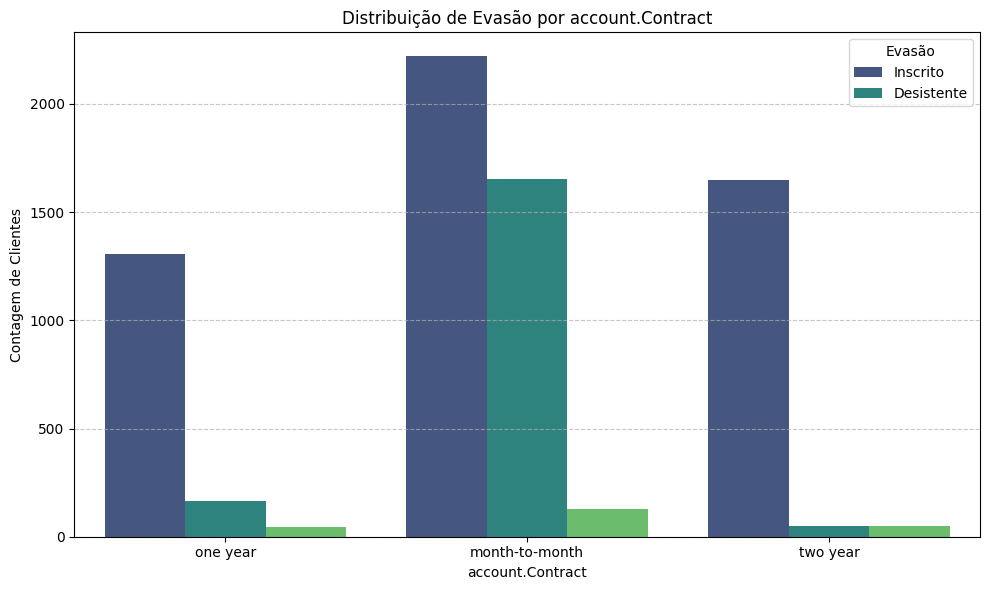
#### Evasão por Método de Pagamento
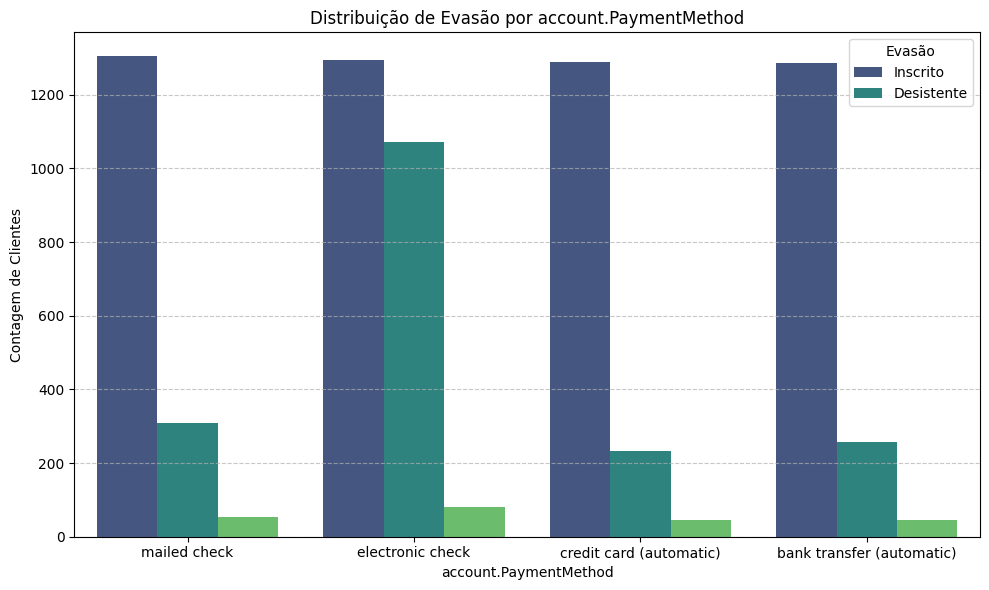
#### Evasão por Idoso
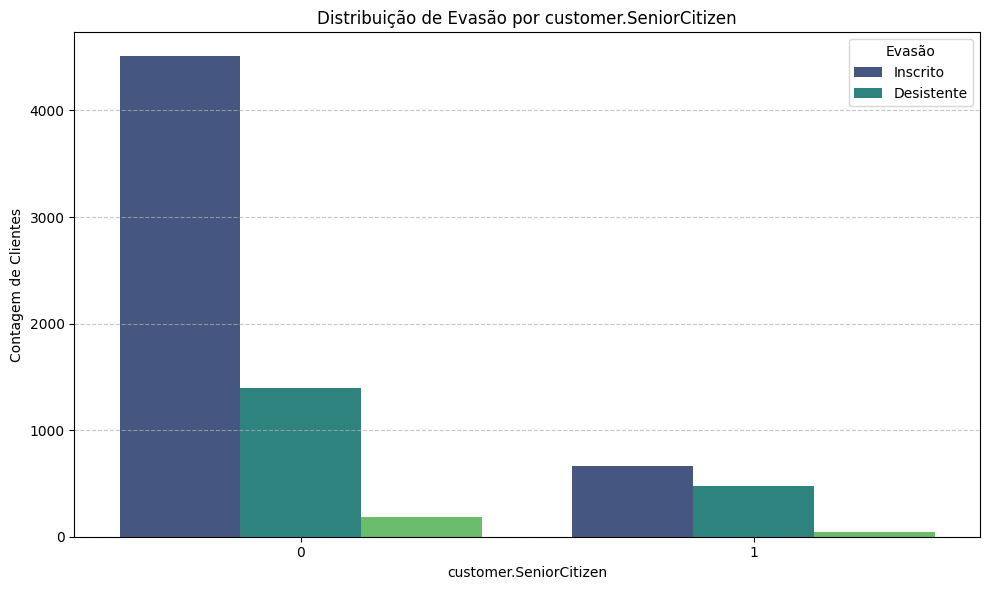
#### Evasão por Múltiplas Linhas Telefônicas
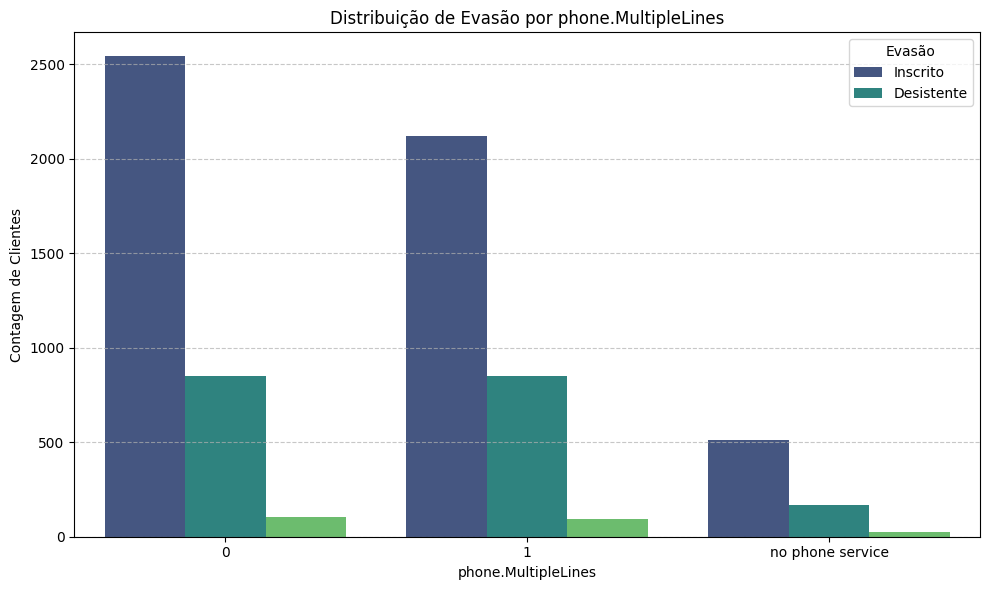
#### Evasão por Serviço de Internet
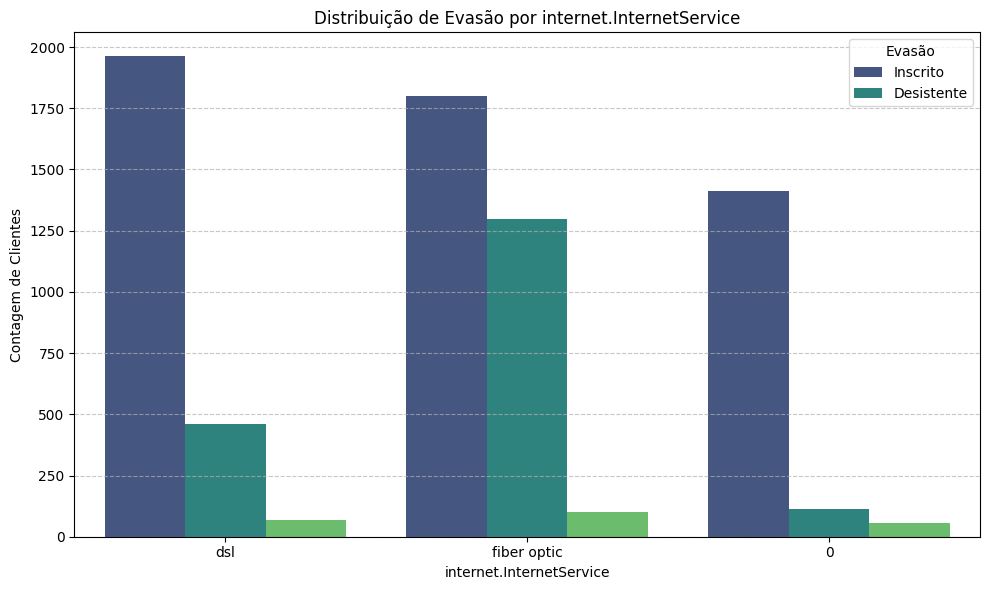
#### Evasão por Streaming de Filmes
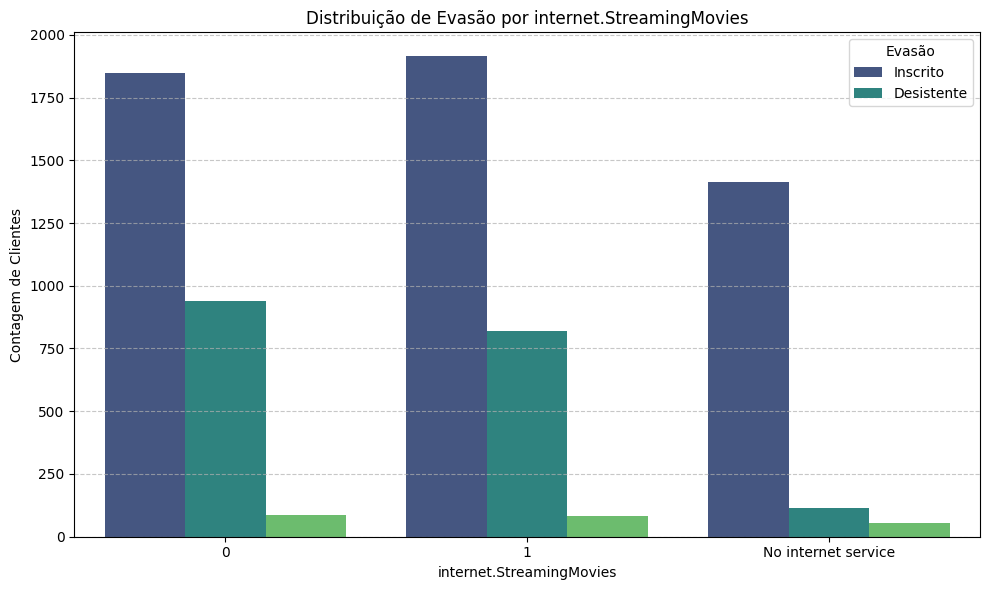
Observações sobre a distribuição da evasão por variáveis categóricas:
- **Tipo de Contrato:** Clientes com contratos de curto prazo (mensais) apresentam uma taxa de Churn (Desistencia) significativamente maior em comparação com contratos de 1 ou 2 anos.
- **Método de Pagamento:** Certos métodos de pagamento (como Pagamento Eletrônico/Electronic check) parecem estar associados a uma maior taxa de Churn (Desistentes).
- **Serviço de Internet:** Clientes com certos tipos de serviço de internet ou sem serviços adicionais (como OnlineSecurity, TechSupport) podem ter maior propensão a evadir.
- **Outras Variáveis:** Análises individuais de gênero, status de idoso, múltiplas linhas e serviços de streaming também fornecem insights sobre quais grupos de clientes têm maior probabilidade de evadir.

### Distribuição do Total Gasto
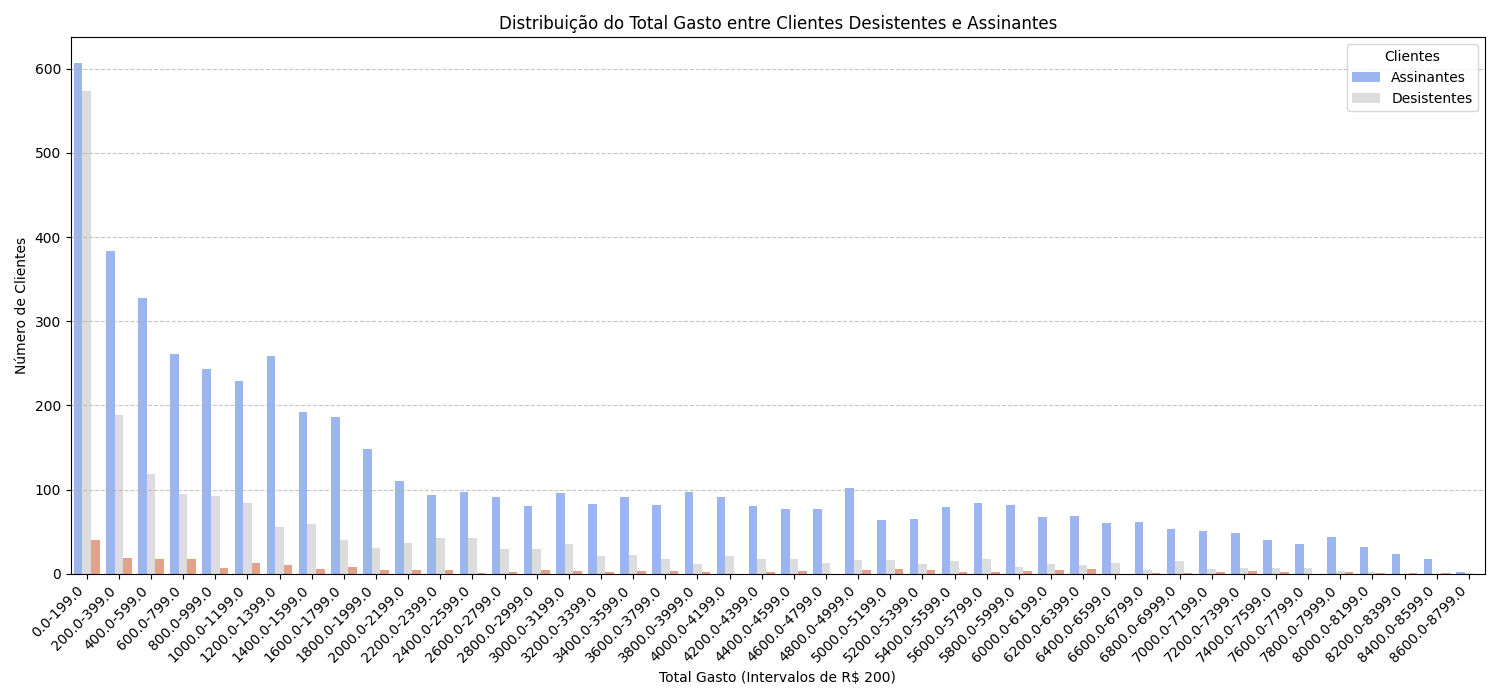
O gráfico mostra a distribuição do total gasto ao longo do tempo pelos clientes, segmentado por status de Churn (Assinantes e Desistestes). Clientes que evadiram tendem a ter um total gasto menor em comparação com os clientes que permanecem. Isso sugere que clientes que acumulam um histórico de gastos maior ao longo do tempo são mais propensos a permanecer fiéis à empresa.

### Distribuição por Tempo de Contrato
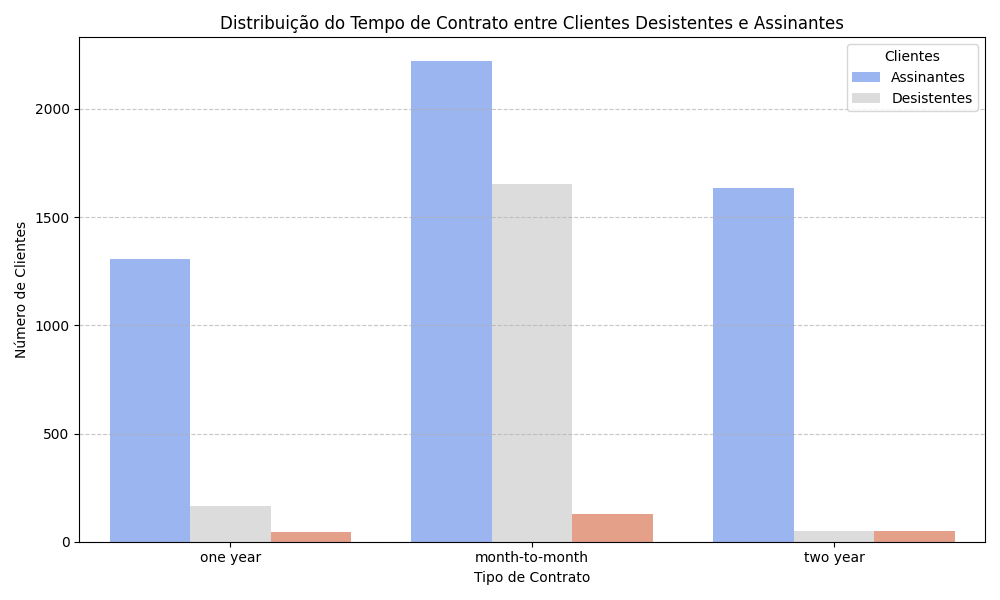

Este gráfico reforça a observação sobre o 'Tipo de Contrato', mostrando claramente que a grande maioria dos clientes que evadem estão em contratos mensais.


## Conclusões e Insights
Com base na análise exploratória, podemos extrair os seguintes insights principais:
- **Contratos Mensais:** Clientes em contratos mensais são o grupo de maior risco para evasão. A flexibilidade pode ser conveniente, mas não promove a lealdade a longo prazo.
- **Métodos de Pagamento:** O método de pagamento 'Electronic check' está associado a uma alta taxa de Churn (Desistência). Pode haver problemas de usabilidade, confiança ou um perfil de cliente diferente associado a este método.
- **Serviços Adicionais de Internet:** A ausência de serviços de segurança online e suporte técnico parece estar correlacionada com uma maior propensão à evasão. Isso sugere que esses serviços podem ser importantes para a satisfação e retenção do cliente.
- **Total Gasto:** Clientes com menor histórico de gastos totais tendem a evadir mais. Isso pode indicar que clientes com maior tempo de casa ou que utilizam mais serviços são mais retidos.


## Recomendações
Com base nos insights obtidos, sugiro as seguintes ações para reduzir a evasão de clientes:
- **Incentivar Contratos de Longo Prazo:** Oferecer descontos ou benefícios adicionais para clientes que optam por contratos de 1 ou 2 anos. Comunicar o valor de permanecer com a empresa a longo prazo.
- **Analisar o Método de Pagamento 'Electronic Check':** Investigar se há problemas específicos ou frustrações associadas ao método de pagamento 'Electronic check' que possam estar contribuindo para a evasão. Considerar oferecer alternativas ou melhorar a experiência com este método.
- **Promover Serviços de Segurança e Suporte:** Destacar o valor e os benefícios dos serviços de segurança online e suporte técnico. Oferecer pacotes atraentes que incluam esses serviços, especialmente para novos clientes com internet.
- **Programas de Fidelidade:** Desenvolver programas de fidelidade que recompensem clientes com maior tempo de casa ou que utilizam múltiplos serviços. Isso pode aumentar o custo de 'troca' para o cliente.
- **Monitoramento Proativo:** Utilizar os insights da análise para identificar clientes em risco de evasão e implementar campanhas de retenção proativas, como ofertas personalizadas ou contato direto.





